# Model 1

In [ ]:
# Scatterplot for Model 1 (training data only)
plot(
  train_data$rm,
  train_data$medv,
  xlab = "rm (average number of rooms)",
  ylab = "medv (median home value)",
  main = "Training Data: medv vs rm",
  pch = 19,
)
# Scatterplot description (training data: medv vs rm):
#
# Direction:
# There is a positive relationship between rm and medv. As the
# average number of rooms increases, median home value tends to
# increase.
#
# Strength:
# The relationship appears moderately strong to strong, with a
# clear upward trend and relatively limited scatter around the
# general pattern.
#
# Curvature:
# The relationship is approximately linear, though there may be
# slight curvature at higher values of rm where medv appears to
# level off near its upper bound.
#
# Outliers:
# A few observations with very high rm values and unusually high
# medv values are visible and may be considered potential outliers
# or high-leverage points.
#-------------------------------------------------------------------------------
# Fit simple linear regression model
model1_slr <- lm(medv ~ rm, data = train_data)

summary(model1_slr)
coef(model1_slr)
# Interpretation of the slope:
# The estimated slope is 8.459, meaning that for each additional
# average room (increase of 1 in rm), the predicted median home value
# increases by about 8.459, where medv is measured in thousands of
# dollars.
#
# In context:
# An increase of one average room is associated with an increase of
# approximately $8,459 in median home value, on average.
#-------------------------------------------------------------------------------
# Diagnostic plots for Model 1: medv ~ rm
par(mfrow = c(1, 2))

# Residuals vs Fitted
plot(
  model1_slr$fitted.values,
  resid(model1_slr),
  xlab = "Fitted values",
  ylab = "Residuals",
  main = "Residuals vs Fitted",
  pch = 19,
)
abline(h = 0, lty = 2)

# Normal Q–Q plot
qqnorm(resid(model1_slr), pch = 19)
qqline(resid(model1_slr))

par(mfrow = c(1, 1))

# Assumptions check for Model 1:
#
# Linearity and constant variance:
# The residuals vs fitted values plot shows residuals scattered
# randomly around zero with no strong curvature or funnel shape.
# This suggests that the linearity and homoscedasticity assumptions
# are reasonably satisfied.
#
# Normality of errors:
# The normal Q–Q plot shows points that fall close to the reference
# line, with only minor deviations in the tails. This suggests that
# the residuals are approximately normally distributed.
#-------------------------------------------------------------------------------
anova(model1_slr)
# The ANOVA F-test tests the null hypothesis
#   H0: beta1 = 0
# versus
#   H1: beta1 ≠ 0.
#
# In this context, it tests whether the predictor rm provides
# any linear explanatory power for medv compared to a model with
# no predictors.
# The F-test produces a very large F-statistic with a p-value that
# is far smaller than 0.05.
#
# Therefore, we reject H0 at the 0.05 significance level and conclude
# that the overall regression is statistically significant.
# In simple linear regression, the ANOVA F-test is equivalent to the
# slope t-test and leads to the same conclusion.
#-------------------------------------------------------------------------------
summary(model1_slr)
# Slope test interpretation:
# The t-test for the slope tests whether the coefficient of rm is
# equal to zero.
#
# The estimated slope is 8.459 and the associated p-value is far
# below 0.05.
#
# Conclusion:
# We reject H0 at the 0.05 significance level and conclude that rm is
# a statistically significant predictor of medv. Neighborhoods with
# more average rooms tend to have higher median home values.
#-------------------------------------------------------------------------------
# Training-set median of rm
x1 <- median(train_data$rm)
x1
# New data point
new_x <- data.frame(rm = x1)

# Point prediction and 95% prediction interval
predict(
  model1_slr,
  newdata = new_x,
  interval = "prediction",
  level = 0.95
)
# Prediction for Model 1:
#
# x1 (training-set median of rm) = x1_value
#
# The point prediction of medv at x1 is yhat_value.
#
# A 95% prediction interval for medv at this value of rm is
# (lower_value, upper_value).
#
# Interpretation:
# We are 95% confident that the median home value for a neighborhood
# with an average number of rooms equal to x1 lies between
# lower_value and upper_value (in thousands of dollars).
#-------------------------------------------------------------------------------
summary(model1_slr)$r.squared
# R-squared for Model 1:
# The R-squared value for the model medv ~ rm is 0.4905282.
#
# Interpretation:
# Approximately 0.4905282 × 100% of the variability in median home
# value (medv) in the training data is explained by the average
# number of rooms (rm).
#-------------------------------------------------------------------------------
# Test MSE for Model 1 (medv ~ rm)
mse_test_model1 <- test_mse(model1_slr, test_data)
mse_test_model1
# Test-set evaluation for Model 1:
# The test mean squared error (MSE_test) for the model medv ~ rm is
# 56.84917.
#
# This value will be used in the final model comparison.

ERROR: Error: object 'train_data' not found


# Model 2

(Intercept)        crim 
 23.4115204  -0.3786043

[1] 0.1709051

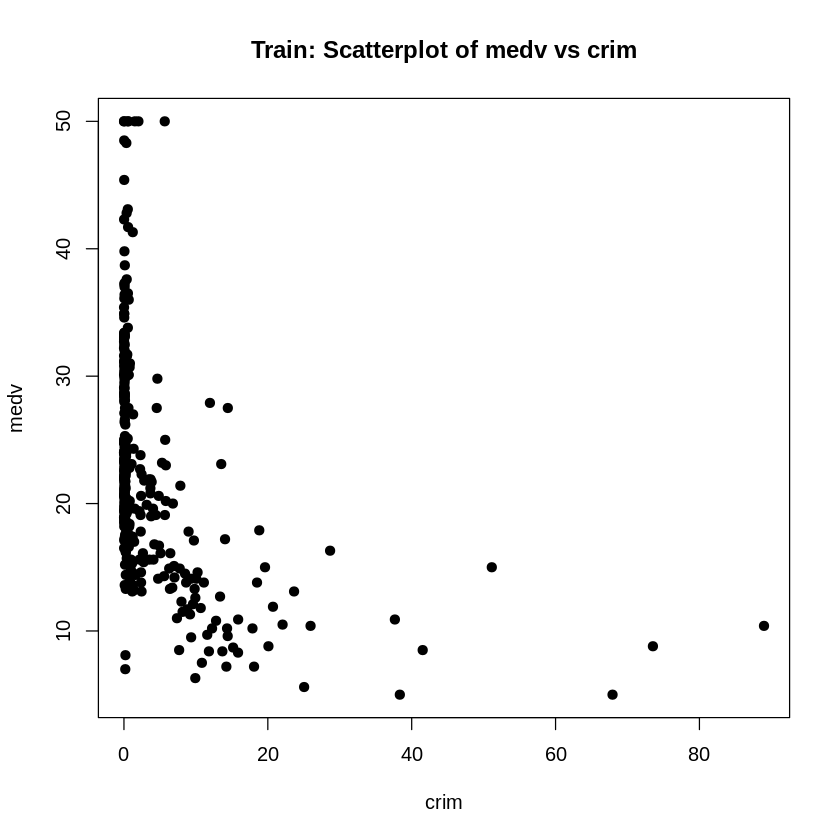

370      167      164      258      226      205      284      204 
3.699750 3.514892 3.490276 3.444908 3.440685 3.415416 3.415163 3.217679 
     234      381 
3.205983 3.012736

167 258 370 204 226 284 254 181 381 234 281 164 233 203 158 490 205 262 
  6   8  21  23  77 106 112 119 140 148 154 218 238 256 286 325 334 348

[1] 52

Q1         Q3        IQR      lower      upper    removed 
 0.0827575  3.3966100  3.3138525 -4.8880213  8.3673887 52.0000000

[1] FALSE

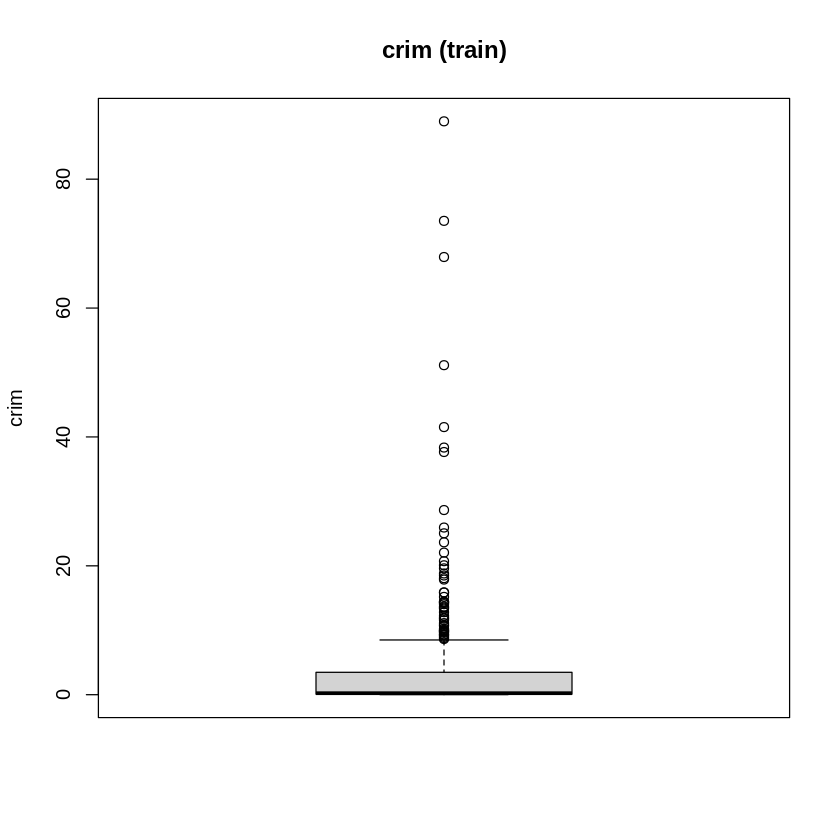

,naive,clean
beta0.(Intercept),23.4115204,24.90998770
beta1.crim,-0.3786043,-1.22635175
R2,0.1709051,0.07928748


[1] 94.62452

[1] 112.2664

167 258 370 204 226 491 284 254 234 281 164 233 203 158 490 205 262 
  5   7  19  21  66  81  88  94 123 129 184 200 214 239 274 283 296

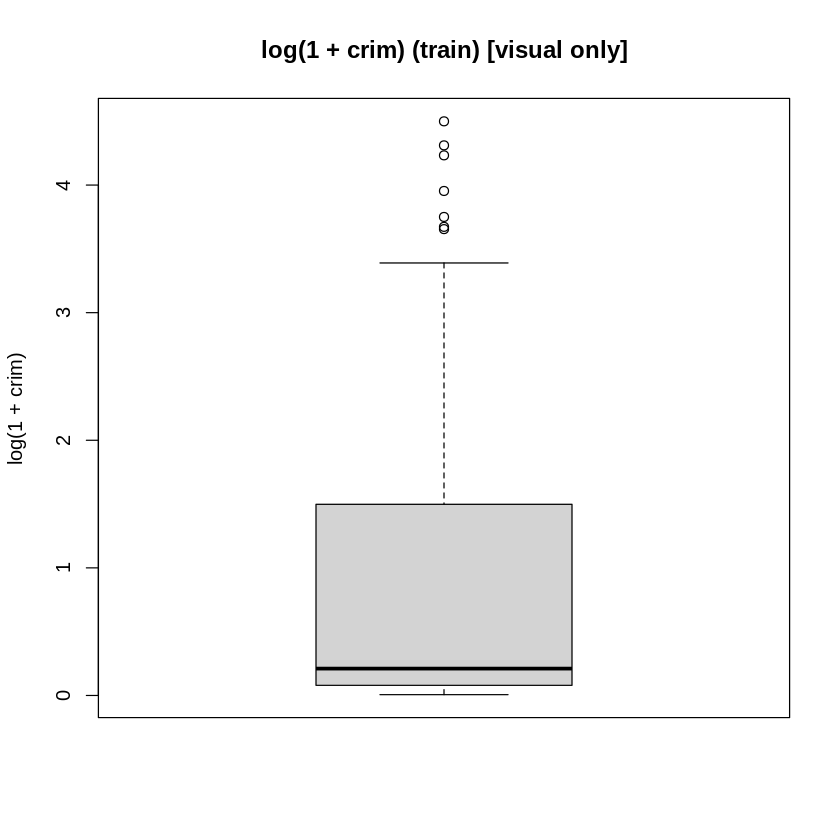

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
crim,1,1550.018,1550.01764,25.8346,6.556598e-07
Residuals,300,17999.319,59.99773,NA,NA


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.909988,0.508946,48.944269,4.568194e-145
crim,-1.226352,0.241276,-5.082775,6.556598e-07


Estimate    Std. Error       t value      Pr(>|t|) 
-1.226352e+00  2.412760e-01 -5.082775e+00  6.556598e-07

[1] 0.785325

,fit,lwr,upr
1,23.9469,8.678264,39.21554


[1] 112.2664

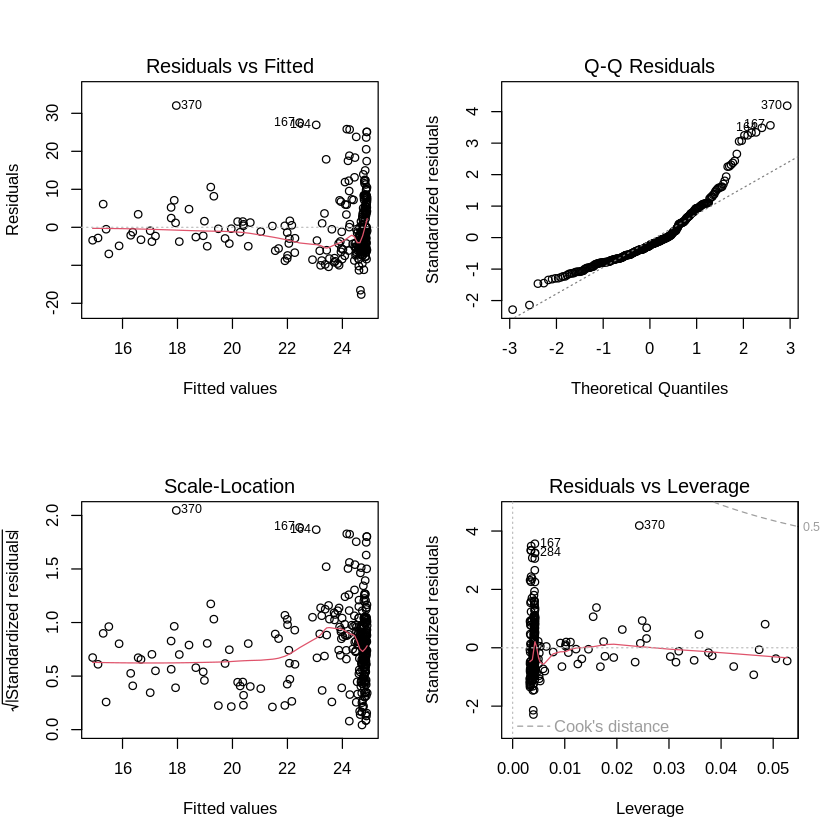

In [ ]:
# Adrian's code

############################################
## Model 2: SLR (medv ~ crim)
## Revised + cleaned workflow
############################################

# Load MASS and Boston
library(MASS)
data("Boston", package = "MASS")

# Subset to variables of interest
working_dataset <- Boston[, c("medv", "rm", "crim", "lstat")]

# Step 0: Train/Test split (70/30) + seed
seed_used <- 4230
set.seed(seed_used)

n <- nrow(working_dataset)
train_idx <- sample(seq_len(n), size = floor(0.70 * n), replace = FALSE)

train_data <- working_dataset[train_idx, ]
test_data  <- working_dataset[-train_idx, ]

# Helper metrics
test_mse <- function(model, test_df) {
  y_true <- test_df$medv
  y_hat  <- predict(model, newdata = test_df)
  mean((y_true - y_hat)^2)
}

train_r2 <- function(model) {
  summary(model)$r.squared
}


############################
## 2.1 Scatterplot (TRAIN)
############################
plot(train_data$crim, train_data$medv,
     xlab = "crim", ylab = "medv",
     main = "Train: Scatterplot of medv vs crim",
     pch = 19)


############################
## 2.2 Naive SLR on TRAIN
############################
m2_naive <- lm(medv ~ crim, data = train_data)

# beta0_hat, beta1_hat, R^2
coef(m2_naive)
summary(m2_naive)$r.squared

# Fitted line form (do NOT include "+ error" here)
# yhat = beta0_hat + beta1_hat * crim


#################################################
## 2.3 Diagnose outliers (TRAIN) - no removal yet
#################################################

# (1) Boxplot of crim
boxplot(train_data$crim, main = "crim (train)", ylab = "crim")

# (2) Studentized residuals from naive model
rstud <- rstudent(m2_naive)

# Biggest studentized residuals (by absolute value)
head(sort(abs(rstud), decreasing = TRUE), 10)

# Flag unusually large studentized residuals (rule of thumb: |r*| > 2)
which(abs(rstud) > 2)


########################################################
## 2.4 Fix: 1.5×IQR rule on crim (TRAIN only, one pass)
########################################################
Q1   <- as.numeric(quantile(train_data$crim, 0.25))
Q3   <- as.numeric(quantile(train_data$crim, 0.75))
IQRc <- Q3 - Q1

lower <- Q1 - 1.5 * IQRc
upper <- Q3 + 1.5 * IQRc

flag_idx <- which(train_data$crim < lower | train_data$crim > upper)

# Report rule details + how many removed
length(flag_idx)
c(Q1 = Q1, Q3 = Q3, IQR = IQRc, lower = lower, upper = upper, removed = length(flag_idx))

# Cleaned training set (test set unchanged)
train_data_clean <- train_data[-flag_idx, ]

# Sanity check: no remaining crim violates the SAME bounds
any(train_data_clean$crim < lower | train_data_clean$crim > upper)

# Boxplot of log(1 + crim): visualization only (does NOT change data/model)
boxplot(log1p(train_data$crim),
        main = "log(1 + crim) (train) [visual only]",
        ylab = "log(1 + crim)")
# This plot is ONLY to show how skewed crim is on a log scale. It does NOT change the data or the model.


########################################
## 2.5 Refit after fixing + comparison
########################################
m2_clean <- lm(medv ~ crim, data = train_data_clean)

# Compare beta0, beta1, and R^2 (train)
cbind(
  naive = c(beta0 = coef(m2_naive)[1], beta1 = coef(m2_naive)[2], R2 = summary(m2_naive)$r.squared),
  clean = c(beta0 = coef(m2_clean)[1], beta1 = coef(m2_clean)[2], R2 = summary(m2_clean)$r.squared)
)

# Optional: test-set comparison (useful for final comparison table)
test_mse(m2_naive, test_data)
test_mse(m2_clean, test_data)


# Studentized residual outliers after IQR fix (response outliers can still exist)
rstud_clean <- rstudent(m2_clean)
which(abs(rstud_clean) > 2)

########################################
## 2.6 Assumptions check (use cleaned model)
########################################
par(mfrow = c(2, 2))
plot(m2_clean)
par(mfrow = c(1, 1))

########################################
## 2.7 ANOVA + slope t-test (CLEANED model: m2_clean)
########################################

# (1) ANOVA F-test (tests H0: beta1 = 0)
anova(m2_clean)

# (2) Slope t-test output (estimate, SE, t, p for crim)
summary(m2_clean)$coefficients

# If you want just the slope row:
summary(m2_clean)$coefficients["crim", ]

########################################
## 2.8 Prediction for x0 = 75th percentile of crim (CLEANED training set)
########################################

# Choose x0
x0 <- as.numeric(quantile(train_data_clean$crim, 0.75))
x0

# Point prediction + 95% prediction interval for a NEW observation at x0
pred_2_8 <- predict(m2_clean,
                    newdata = data.frame(crim = x0),
                    interval = "prediction",
                    level = 0.95)
pred_2_8

## Test-set evaluation: MSE_test for cleaned Model 2 (use original test set)
mse_test_m2_clean <- test_mse(m2_clean, test_data)
mse_test_m2_clean


############################################################
## Written answers for Model 2 (medv ~ crim)
## (Paste this at the bottom of your script as comments)
############################################################

# 2.1 Scatterplot (train)
# The scatterplot shows a negative association between crim and medv.
# As crim increases, medv tends to decrease.
# Most towns have very small crim values, and a few towns have very large crim values (right-skew).
# Those few large crim points are potential outliers and can strongly affect the fitted line.

# 2.2 Naive SLR on train (no removal yet)
# Fitted line (naive, train):
#   yhat = 23.4115  - 0.3786 * crim
# Interpretation of slope:
# For a 1-unit increase in crim, the predicted medv decreases by about 0.379 (in $1000s), on average.
# Training R^2 (naive) = 0.1709, so crim alone explains about 17% of the variation in medv on the training set.

# 2.3 Outlier diagnosis (train)
# Method 1 (boxplot of crim):
# The boxplot shows crim is highly right-skewed with several large values far above the rest.
# Method 2 (studentized residuals from naive model):
# Several observations have |studentized residual| > 2, meaning the model fits them unusually poorly.
# This suggests possible response outliers and/or points that do not follow the overall linear pattern.

# 2.4 Fix using 1.5*IQR rule on crim (train only)
# Rule used:
#   Q1 = 0.08276, Q3 = 3.39661, IQR = 3.31385
#   lower = Q1 - 1.5*IQR = -4.8880
#   upper = Q3 + 1.5*IQR = 8.3674
# Since crim cannot be negative, the practical rule is mainly crim > 8.3674.
# I removed 52 training observations with crim outside these bounds.

# 2.5 Refit after fix and compare
# Cleaned model fitted line:
#   yhat = 24.9100  - 1.2264 * crim
# Comparison to naive:
# - The cleaned slope is more negative in size (from -0.3786 to -1.2264).
#   This means the fitted relationship became steeper after removing high-crim outliers.
# - Training R^2 went down (0.1709 to 0.0793), so the cleaned model explains less training variation.
# - Test MSE got worse:
#     naive test MSE  = 94.6245
#     clean test MSE  = 112.2664
#   So removing those training outliers did not improve prediction on the original test set.
# A likely reason is that the test set still contains some high-crim towns, and the cleaned model learned mainly from moderate crim values.

# 2.6 Assumptions check (cleaned model diagnostic plots)
# Residuals vs Fitted:
# The residuals show some pattern and the spread is not perfectly constant.
# Scale-Location:
# The spread is not perfectly flat, suggesting non-constant variance (heteroskedasticity).
# Normal Q-Q:
# The tail points bend away from the line, suggesting residuals are not perfectly normal (heavy tails).
# Residuals vs Leverage:
# There are a few points with higher leverage. These can influence the fitted line.
# Overall, the simple linear model is a rough summary, but the assumptions are not perfect.

# 2.7 ANOVA F-test and slope t-test (cleaned model)
# Hypotheses:
#   H0: beta1 = 0  (no linear relationship between crim and medv)
#   HA: beta1 DN= 0 (there is a linear relationship)
# Results:
# - ANOVA F-test p-value = 6.557e-07
# - Slope t-test p-value = 6.557e-07
# Decision:
# Since p is very small (< 0.05), reject H0.
# Conclusion:
# There is strong evidence of a negative linear relationship between crim and medv in the cleaned training data.

# 2.8 Prediction at x0 = 75th percentile of crim (cleaned train)
# x0 = 0.785325
# Point prediction:
#   yhat = 23.9469 (in $1000s)
# 95% prediction interval for a NEW town:
#   (8.6783, 39.2155)
# Interpretation:
# For a new town with crim about 0.785, we predict medv around 23.95.
# A single new town value could reasonably fall anywhere from about 8.68 to 39.22, so the uncertainty is wide.

############################################################
## Final comparison table values for Model 2 (what to enter)
############################################################
# Model: 2
# Predictor: crim
# Training R^2 (final cleaned): 0.07928748
# Test MSE (final cleaned): 112.2664
# Notes (issues/fix):
#   crim was highly right-skewed with high outliers.
#   Removed 52 training points using the 1.5*IQR rule (crim > 8.3674).
#   Refit model; test MSE increased compared to naive, so prediction got worse on the original test set.




# Model 3


In [ ]:
#Scatterplot of medv vs lsat
plot(
  train_data$lstat,
  train_data$medv,
  xlab = "lstat (% lower status of population)",
  ylab = "medv (Median home value)",
  main = "Training Data: medv vs lstat",
  pch = 19
)

# Scatterplot description (training data: medv vs lstat)
# There is a strong negative relationship between lstat and medv:
# as the percentage of lower-status population increases, median
# home value clearly decreases.
#
# The relationship is not linear. The decline in medv is steep at
# low to moderate lstat values and then flattens out at higher lstat
# values, indicating noticeable curvature (concave downward).
#
# The variance of medv is not constant across lstat. There is a
# fan-shaped pattern where variability is much larger for small
# lstat values and shrinks as lstat increases, suggesting
# heteroskedasticity.
#
# There also appears to be a ceiling effect near medv = 50 for
# small lstat values, which may influence model fit and residuals.
#
# Conclusion:
# The scatterplot suggests that a simple linear regression model
# medv ~ lstat may be inadequate due to nonlinearity,
# non-constant variance, and a ceiling effect. A transformation
# or nonlinear model may be more appropriate.

#-------------------------------------------------------------------------------

# Fit simple linear regression model
model3_slr <- lm(medv ~ lstat, data = train_data)

# View model summary
summary(model3_slr)
coef(model3_slr)

# Fitted equation:
# medv_hat = beta0 + beta1 * lstat

train_r2(model3_slr)
summary(model3_slr)$r.squared

# Model 3 (untransformed SLR):
# The fitted model using the training data is
#   medv_hat = 33.6216889   + 0.95 * lstat
#
# The training R-squared for this model is 0.5590131.
#-------------------------------------------------------------------------------
# Before Transformation

# Diagnostic plots for Model 3: medv ~ lstat
par(mfrow = c(2, 2))
plot(model3_slr)
par(mfrow = c(1, 1))

# 1. Linearity:
#    The Residuals vs Fitted plot shows a clear curved pattern rather
#    than random scatter around zero, indicating violation of the
#    linearity assumption.
#
# 2. Homoscedasticity:
#    The Residuals vs Fitted and Scale–Location plots show a funnel
#    shape, with larger residual variance at low fitted values and
#    smaller variance at higher fitted values. This indicates
#    heteroscedasticity (non-constant variance).
#
# 3. Normality of errors:
#    The Normal Q–Q plot shows noticeable deviations from the straight
#    line, particularly in the upper tail, indicating that the
#    residuals are not normally distributed.
#
# Conclusion:
# Multiple linear regression assumptions are violated, including
# linearity, constant variance, and normality of errors. This
# supports the need for a transformation or nonlinear model.
#-------------------------------------------------------------------------------

# AFTER: Transformed model (medv ~ log(lstat))
par(mfrow = c(2, 2))
plot(model3_logx)
mtext("AFTER: medv ~ log(lstat)", side = 3, line = -2, outer = TRUE)

par(mfrow = c(1, 1))

# AFTER (medv ~ log(lstat)):
# - Residuals vs Fitted plot shows much less curvature and more
#   random scatter around zero, indicating improved linearity.
# - The funnel shape is substantially reduced, indicating more
#   constant variance.
# - Q–Q plot shows residuals closer to the straight line,
#   indicating improved normality.
#
# Conclusion:
# The log transformation of lstat noticeably improves all major
# diagnostic issues present in the untransformed model.
#-------------------------------------------------------------------------------

# Refit transformed model
model3_logx <- lm(medv ~ log(lstat), data = train_data)
summary(model3_logx)

# The fitted model using the training data is
#   medv_hat = 50.70 - 11.99 * log(lstat)
#
# Since the predictor was transformed (and not the response),
# the fitted equation is reported on the original medv scale.
#-------------------------------------------------------------------------------

#Re-check assumptions. Show the same diagnostics again and explain what improved.

# 1. Linearity:
#    The Residuals vs Fitted plot shows substantially less curvature
#    compared to the untransformed model. Residuals are more randomly
#    scattered around zero, indicating improved linearity.
#
# 2. Homoscedasticity:
#    The funnel-shaped pattern observed previously is noticeably
#    reduced. Residual spread is more uniform across fitted values,
#    indicating improved (though not perfect) constant variance.
#
# 3. Normality of errors:
#    The Normal Q–Q plot shows residuals closer to the reference line,
#    particularly in the tails, indicating improved normality of the
#    error distribution.
#
# Conclusion:
# The log transformation of lstat improves all major regression
# diagnostics, addressing the nonlinearity and heteroscedasticity
# seen in the original model and yielding residuals closer to normal.
#-------------------------------------------------------------------------------

anova(model3_logx)
summary(model3_logx)
# ANOVA F-test interpretation:
# The ANOVA F-test tests the null hypothesis
#   H0: beta1 = 0
# versus
#   H1: beta1 ≠ 0.
#
# For the transformed model medv ~ log(lstat), the F-test produces
# a very large F-statistic with a p-value essentially equal to 0.
# This provides overwhelming evidence against H0.
#
# Conclusion:
# There is a statistically significant linear relationship between
# log(lstat) and medv in the transformed model.
#-------------------------------------------------------------------------------

# Training-set median of lstat
x0 <- median(train_data$lstat)
x0

# Create new data frame for prediction
new_x <- data.frame(lstat = x0)

# Point prediction and 95% prediction interval
predict(
  model3_logx,
  newdata = new_x,
  interval = "prediction",
  level = 0.95
)
# Prediction for transformed Model 3:
#
# x0 was chosen as the training-set median of lstat (x0 = 11.675).
#
# The point prediction of medv at x0 is 21.23.
#
# A 95% prediction interval for medv at this value of lstat is
# (11.46, 30.99).
#
# Interpretation:
# We are 95% confident that the median home value for a neighborhood
# with lstat equal to the training-set median lies between about
# $11,460 and $30,990.
#-------------------------------------------------------------------------------
# Test MSE for transformed Model 3
mse_test_model3_logx <- test_mse(model3_logx, test_data)
mse_test_model3_logx


# Final Comparison

In [ ]:
r2_m1 <- train_r2(model1_slr)

# Important: Model 2 was fit on train_data_clean, so compute R2 from that fit
r2_m2 <- summary(m2_clean)$r.squared

r2_m3 <- train_r2(model3_logx)

# --- Test MSE values (use original held-out test set for all) ---
mse_m1 <- test_mse(model1_slr, test_data)
mse_m2 <- test_mse(m2_clean, test_data)
mse_m3 <- test_mse(model3_logx, test_data)

notes_m1 <- "Clean SLR; assumptions mostly OK"
notes_m2 <- "Outliers in crim; removed 1.5×IQR outliers on TRAIN only; refit"
notes_m3 <- "Nonlinearity/heterosced; used log(lstat) to improve diagnostics"

final_comparison <- data.frame(
  Model = c("1", "2", "3"),
  Predictor = c("rm", "crim", "lstat (log-transformed)"),
  Train_R2 = c(r2_m1, r2_m2, r2_m3),
  Test_MSE = c(mse_m1, mse_m2, mse_m3),
  Notes = c(notes_m1, notes_m2, notes_m3)
)
final_comparison$Train_R2 <- round(final_comparison$Train_R2, 3)
final_comparison$Test_MSE <- round(final_comparison$Test_MSE, 2)

final_comparison
final_comparison[order(final_comparison$Test_MSE), ]


# *Presentation*

Beamer Skeleton on Overleaf: https://www.overleaf.com/6497167154sjggjcmhrbtm#b30639
